In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = 'insurance.csv'
df = pd.read_csv(file)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


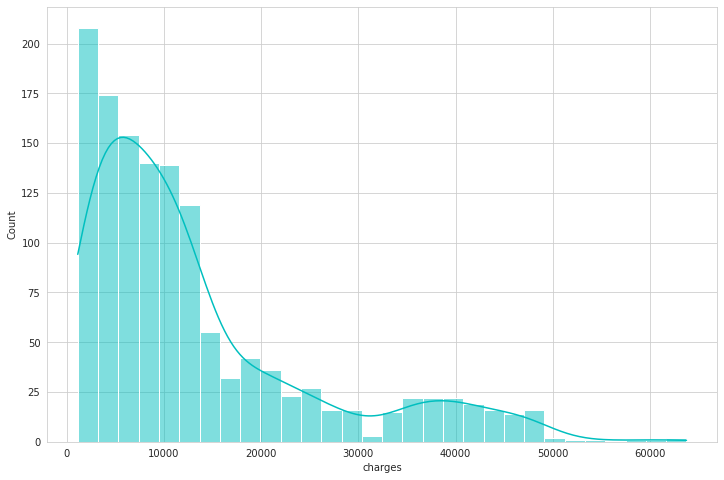

In [5]:
sns.set_style(style='whitegrid')
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(df['charges'],kde=True,color='c')
plt.show()

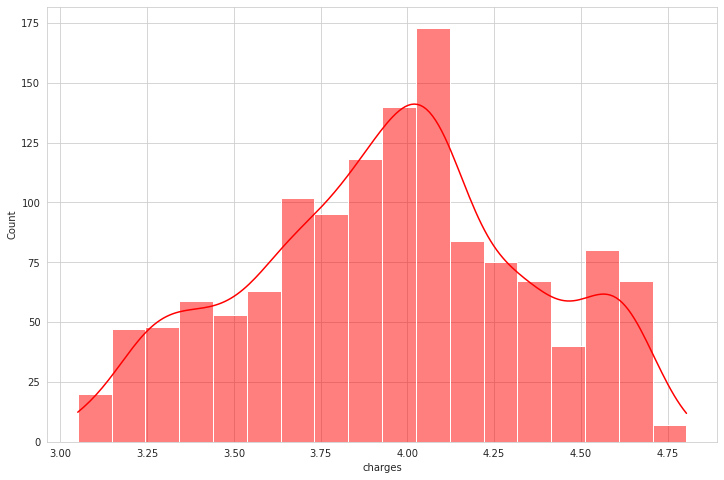

In [6]:
#The distribution is right skewed, we will amend it by taking logarithm
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.histplot(np.log10(df['charges']),kde=True,color='r')
plt.show()

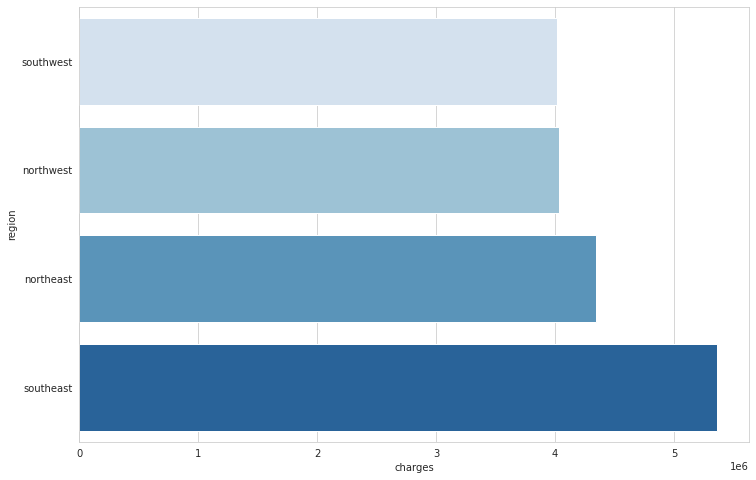

In [7]:
#Taking a look at the charges by region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x=charges.head(),y=charges.head().index,palette='Blues')
plt.show()

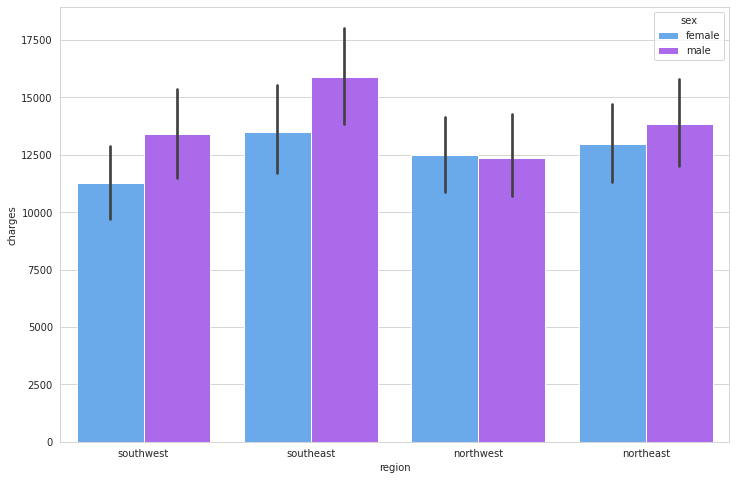

In [8]:
#It appears charges are more in the southeast region
#Let us take a look at how charges vary in each region according to certain factors such as sex,
#age and no. of children
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='region',y='charges',hue='sex',data=df,palette='cool')
plt.show()

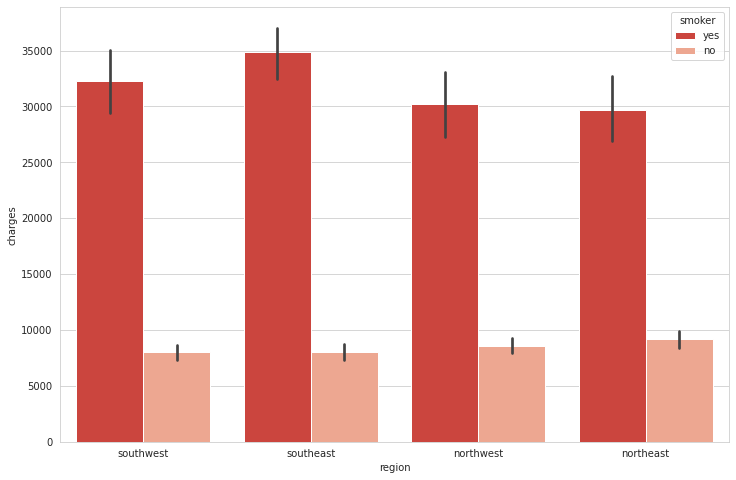

In [9]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='Reds_r')

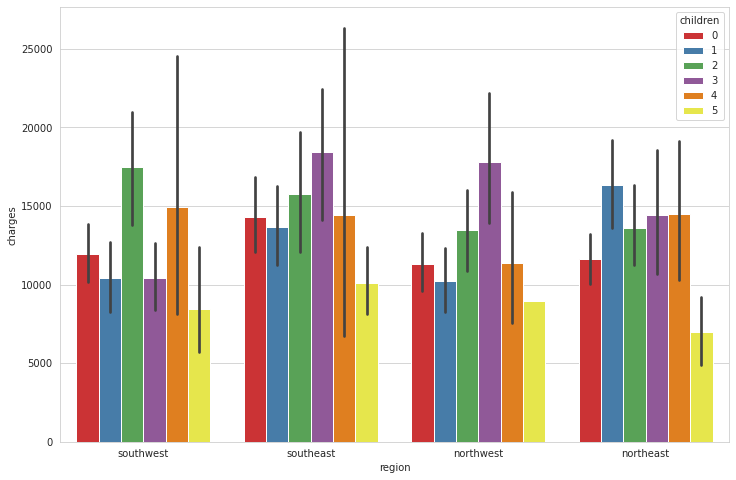

In [10]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.barplot(x='region',y='charges',hue='children',data=df,palette='Set1')

From the graphs, we can observe that overall, charges are higher in the southeast region. People in the southeast tend to smoke more than people in the northeast, but northeast has higher charges in terms of gender than southwest and northwest overall. Charges tend to be more for people wth more children too. 

In [11]:
#Converting object datatypes to category
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df.sex.drop_duplicates())
df.sex = encoder.transform(df.sex)
encoder.fit(df.region.drop_duplicates())
df.region = encoder.transform(df.region)
encoder.fit(df.smoker.drop_duplicates())
df.smoker = encoder.transform(df.smoker)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


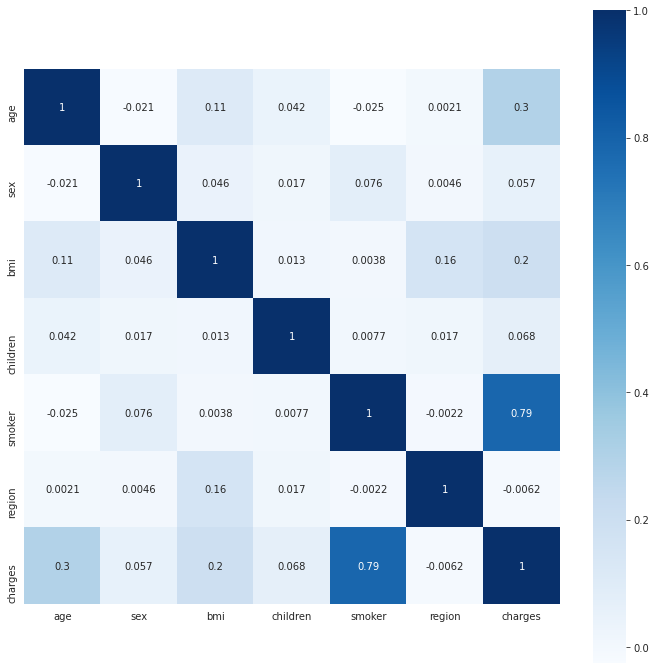

In [13]:
#Observing correlation between features
fig,ax = plt.subplots(1,1,figsize=(12,12))
ax = sns.heatmap(df.corr(),annot=True,cmap='Blues',square=True)

No strong correlation observed except between smoker and charges
Sex and region can be dropped as it does not have strong correlation

In [14]:
#Building the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = df.drop(['sex','region','charges'],axis=1)
y = df.charges

train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.8,random_state=0)
model = LinearRegression()
model.fit(train_X,train_y)
preds = model.predict(test_X)

print(model.intercept_)
print(model.coef_)
print(model.score(test_X,test_y))

actual_v_pred_linear = pd.DataFrame({'Actual':test_y,'Predicted':preds})
actual_v_pred_linear.to_csv('LinearRegressionResults.csv')

-11910.538156786186
[  254.97145832   320.6190203    430.54569459 23587.5571278 ]
0.7978274606303823


In [15]:
#Using random forest
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(train_X,train_y)
preds = rfr_model.predict(test_X)

print(metrics.r2_score(test_y,preds))
actual_v_pred_rfr = pd.DataFrame({'Actual':test_y,'Predicted':preds})
actual_v_pred_rfr.to_csv('RandomForestRegressionResults.csv')

0.8607896912218109
